## Fraunhoferova difrakcija na jednostrukoj pukotini
#### Kod je pisan u Python programskom jeziku koristeći Jupyter notebook

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.fftpack import fft      #paket za FFT
from scipy.fftpack import ifftshift,  fftshift

from mpl_toolkits.mplot3d import Axes3D   #paket za 3d plot
plt.style.use('dark_background')          # izbor boja za plot
plt.rcParams['image.cmap'] = 'plasma'

In [6]:

def Fraunhofer_input(lambd,w,z):
    N=1048   #rezolucija
    L=5.    # širina zaslona na kojem se javlja difrakciona slika

    lamb=lambd*10**(-9) #(mm) talasna dužina svjetlosti
    z=z/1000.  #udaljenost pukotina - zaslon /mm
#    w  #širina otvora (mm)
    k=2*np.pi/lamb   

    delta_src=L/N     #prostorna frekvencija
    
    #definisanje ravni otvora
    xv=np.linspace(-N/2,N/2-1,N)
    yv=np.linspace(-N/2,N/2-1,N)
    [x1,y1]=np.meshgrid(xv,yv)
    x1=x1*delta_src  #(mm)
    y1=y1*delta_src  # (mm) 
 
    #definisati pukotinu
    X=np.where(np.abs(x1)<w/4,1,0)
 
    u1=X #elekticno polje na pukotini
    x1=x1/1000.

# Fourierova transformacija  izračunavanje integrala   
    g=u1
    G=fftshift(np.fft.fft(g))
    h=np.exp(1j*k*z)/np.sqrt(1j*lamb*z)*np.exp(1j*k/(2*z)*x1**2)
    u2=h*G
    
    identity=np.ones((N,N))
    u2=u2*identity
    
    # Intenzitet zračenja (normiran na jedinicu)
    
    I=1./(lamb*z)*np.abs(u2)**2
    I_1d=np.zeros(N)
    for a in range (1,N):
        I_1d[a]=I[0][a]
               
    return(u2,I_1d,y1) #OUTPUT: električno polje na zaslonu, intenzitet i koordinate ravni otvora

In [7]:
lamb=632.
w=0.05
z=20.

u1,I1,x1=Fraunhofer_input(lamb,5*w,1000.)
u2,I2,x2=Fraunhofer_input(lamb,w,100000.)
u3,I3,x3=Fraunhofer_input(lamb,w/2,1000.)


I1=np.abs(I1)
I2=np.abs(I2)
I3=np.abs(I3)

I1=I1/I1.max()
I2=I2/I2.max()
I3=I3/I3.max()

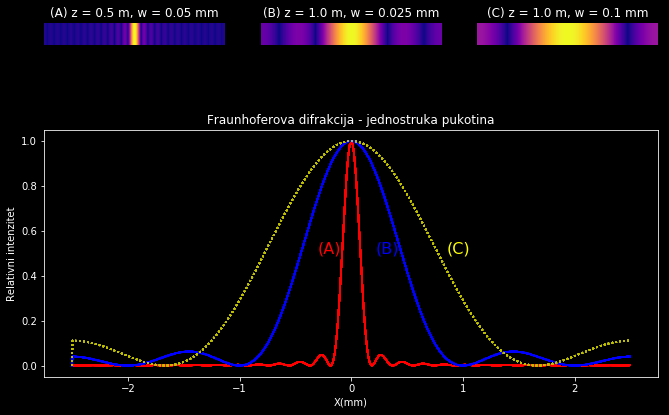

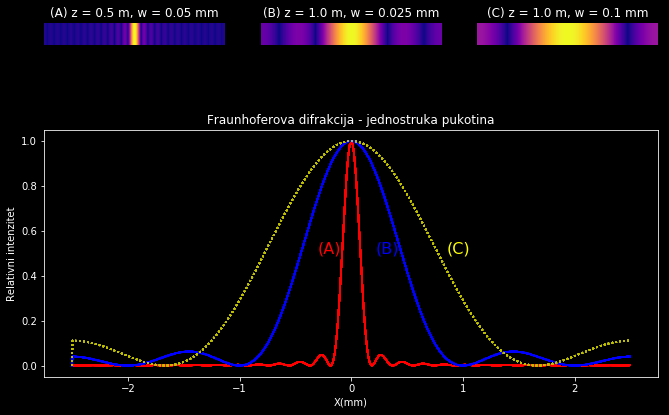

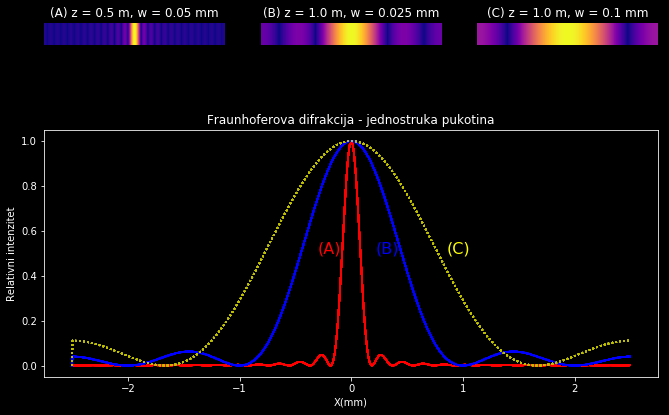

In [9]:
# PLOTANJE difrakcione slike i intenziteta zračenja

fig2=plt.figure(figsize=(11,10)) 

ax1=fig2.add_subplot(4,3,4)
plt.title('(A) z = 0.5 m, w = 0.05 mm')
plt.imshow(np.abs(u1))
plt.ylim(460,588)
plt.axis('off')
plt.xlabel('(A)')

ax2=fig2.add_subplot(4,3,5)
plt.title('(B) z = 1.0 m, w = 0.025 mm')
plt.imshow(np.abs(u2))
plt.ylim(460,588)
plt.xlabel('(B)')
plt.axis('off')

ax3=fig2.add_subplot(4,3,6)
plt.title('(C) z = 1.0 m, w = 0.1 mm')
plt.imshow(np.abs(u3))
plt.ylim(460,588)
plt.xlabel('(C)')
plt.axis('off')

ax4=fig2.add_subplot(2,1,2)
plt.title('Fraunhoferova difrakcija - jednostruka pukotina')

ax4_1=ax4.plot(x1,np.abs(I1),'r-')
ax4_2=ax4.plot(x2,np.abs(I2),'b-')
ax4_3=ax4.plot(x3,np.abs(I3),'y:')


ax4.text(-0.3,0.5,'(A)', color='red',fontsize=16)
ax4.text(0.22,0.5,'(B)', color='blue',fontsize=16)
ax4.text(0.85,0.5,'(C)', color='yellow',fontsize=16)

plt.xlabel('X(mm)')
plt.ylabel('Relativni intenzitet')
fig2.savefig('Fraunhofer_1slit.png')
plt.show()